<a href="https://colab.research.google.com/github/Azzimihr/ml-lab/blob/main/preload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
from math import *
from random import *
from seaborn import *
from matplotlib.pyplot import show
from missingno import matrix as mn

from sklearn.linear_model import LogisticRegression as logit
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.dummy import DummyClassifier as dummyc
from sklearn.metrics import classification_report as report
from sklearn.metrics import mean_squared_error as mse

In [89]:
k=6
n=2

x=np.random.uniform(0,20,size=500)
e=np.random.normal(scale=5,size=500)
y=k*x+n
Y=y+e

#lineplot(x=x,y=y)
#scatterplot(x=x,y=Y)
#show()
#scatterplot(x=x,y=e)

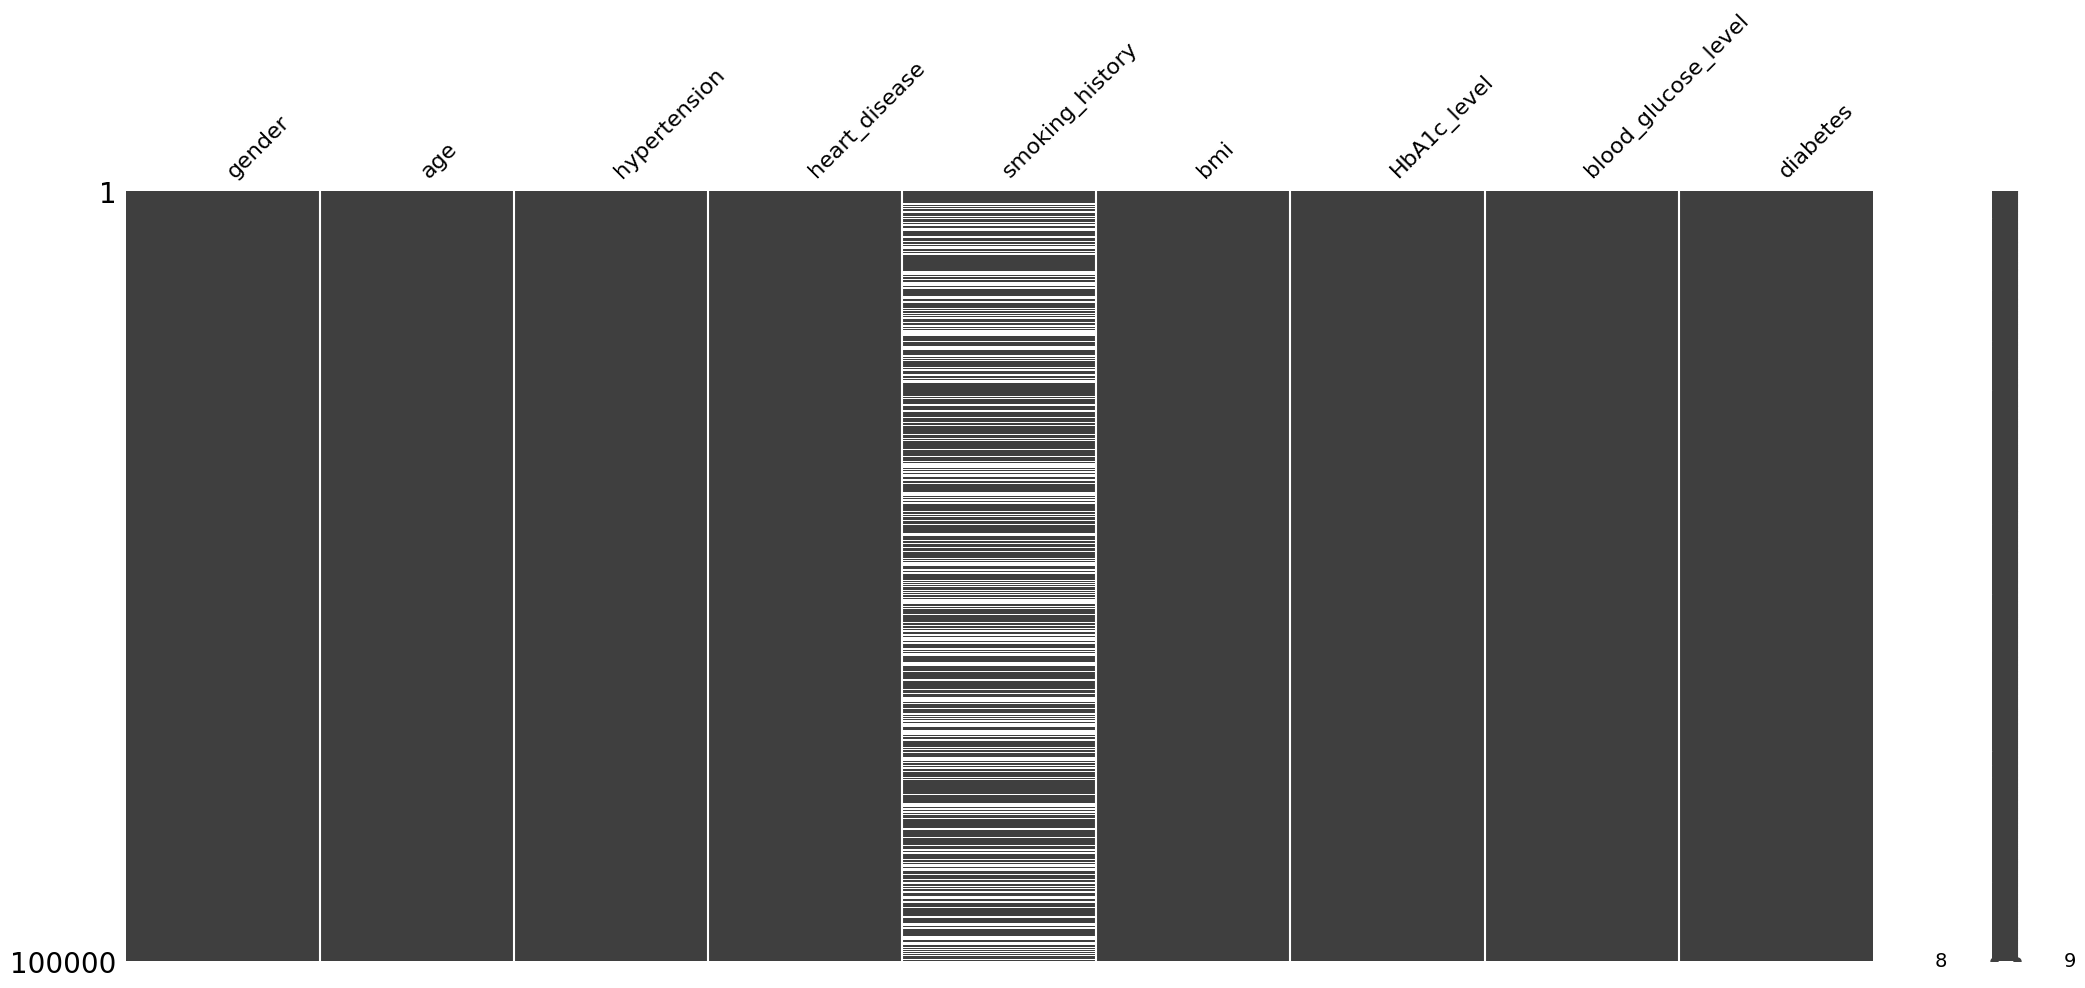

<ipython-input-95-178d9e651b4d>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(df.corr(),annot=True,cmap="vlag",center=0)


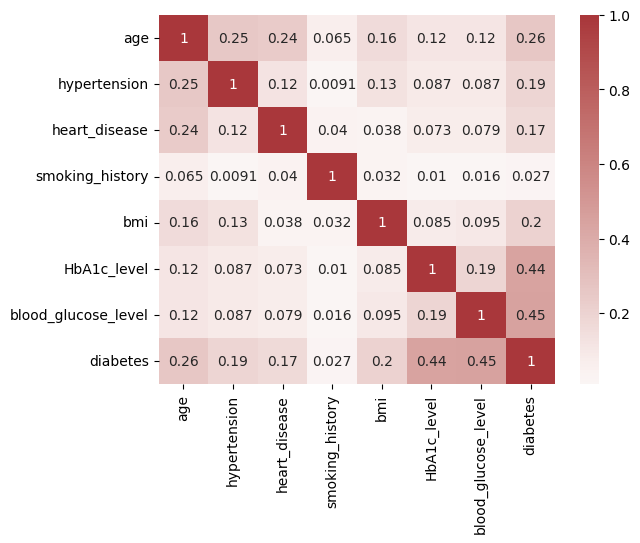

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11419
           1       0.00      0.00      0.00      1418

    accuracy                           0.89     12837
   macro avg       0.44      0.50      0.47     12837
weighted avg       0.79      0.89      0.84     12837

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11419
           1       0.88      0.64      0.74      1418

    accuracy                           0.95     12837
   macro avg       0.92      0.81      0.86     12837
weighted avg       0.95      0.95      0.95     12837



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [95]:
df=pd.read_csv("diabetes.csv")#.drop(columns="No")
model = logit()
dummy = dummyc()

def replace(a,b):
  global df
  df=df.replace(a,b)

replace("Female",0)
replace("Male",1)

replace("never",0)
replace("ever",0)
replace("former",0.5)
replace("not current",0.5)
replace("current",1)
replace("No Info",np.nan)

mn(df)
show()
df=df.dropna()

heatmap(df.corr(),annot=True,cmap="vlag",center=0)
show()

train, test = split(df, test_size=0.2)

dummy.fit(X=train[['age', 'hypertension', 'bmi', 'HbA1c_level','blood_glucose_level','smoking_history']], y=train['diabetes'])
yd = dummy.predict(X=test[['age', 'hypertension', 'bmi', 'HbA1c_level','blood_glucose_level','smoking_history']])

model.fit(X=train[['age', 'hypertension', 'bmi', 'HbA1c_level','blood_glucose_level','smoking_history']], y=train['diabetes'])
yp = model.predict(X=test[['age', 'hypertension', 'bmi', 'HbA1c_level','blood_glucose_level','smoking_history']])

yt = test[['diabetes']]

print(report(yt, yd))
print(report(yt, yp))
#df.head()